In [132]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [133]:
airline_data = pd.read_csv(r'C:\Users\ASUS-PC\Downloads\AirPassengers.csv')

In [134]:
airline_data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [135]:
airline_data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [136]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [137]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


In [138]:
data = pd.read_csv((r'C:\Users\ASUS-PC\Downloads\AirPassengers.csv'), parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print(data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [140]:
test=data['OCT-1960':]
train=data[:'SEP-1960']

In [141]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-05-01,472
1960-06-01,535
1960-07-01,622


In [142]:
test

,#Passengers
Month,
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [143]:
ts=data["#Passengers"]
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

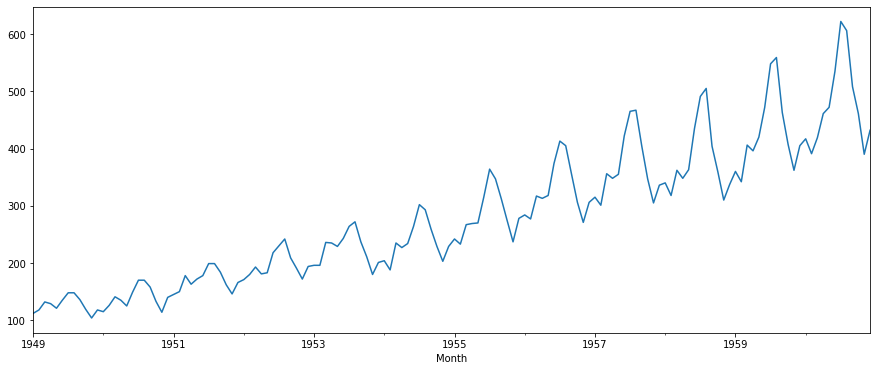

In [144]:
rcParams['figure.figsize'] = 15, 6
ts.plot()

In [145]:
#we can see from this above graph that datset has a clear Trend.
#This suggests that the timeseries is not stationary.it will require differencing to make it stationary. 

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

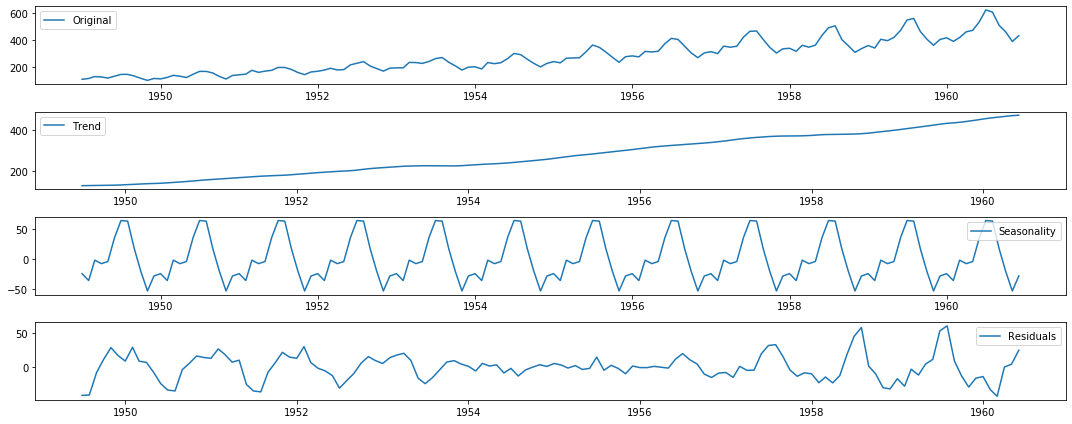

In [147]:
decomposition = seasonal_decompose(ts)


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


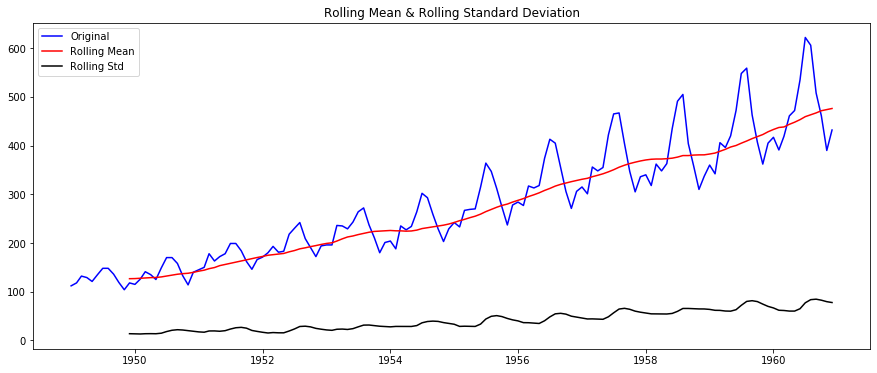

In [169]:
rolling_mean = ts.rolling(window = 12).mean()
rolling_std =ts.rolling(window = 12).std()
plt.plot(ts, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [ ]:
As you can see, the #from above graph we can see that rolling mean and rolling standard deviation increase with time. Therefore, we can conclude that the time series is not stationar

In [149]:
diff1_ts = ts-ts.shift()

In [150]:
diff1_ts.dropna(inplace=True)
dftest=adfuller(diff1_ts, autolag='AIC')
dftest

(-2.8292668241699874,
 0.05421329028382711,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

In [151]:
diff2_ts = diff1_ts-diff1_ts.shift()
diff2_ts.dropna(inplace=True)
dftest=adfuller(diff2_ts, autolag='AIC')
dftest

(-16.384231542468513,
 2.7328918500142026e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.6020417275606)

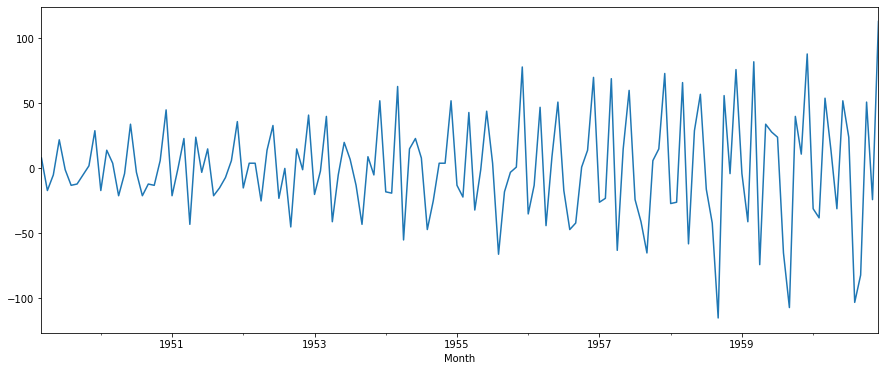

In [152]:
diff2_ts.plot()

In [153]:
#eliminate trend & seasonality
ts_log=np.log(ts)
dftest=adfuller(ts_log)
dftest

(-1.7170170891069714,
 0.4223667747703857,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

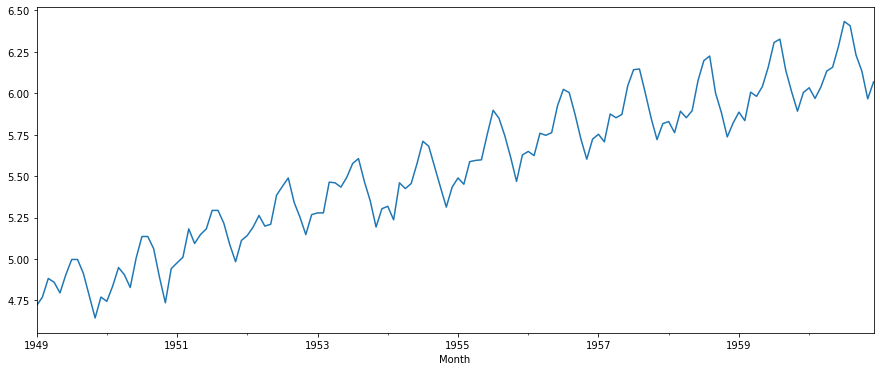

In [154]:
ts_log.plot()

In [155]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
dftest=adfuller(ts_log_diff)
dftest

(-2.717130598388145,
 0.0711205481508568,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568105)

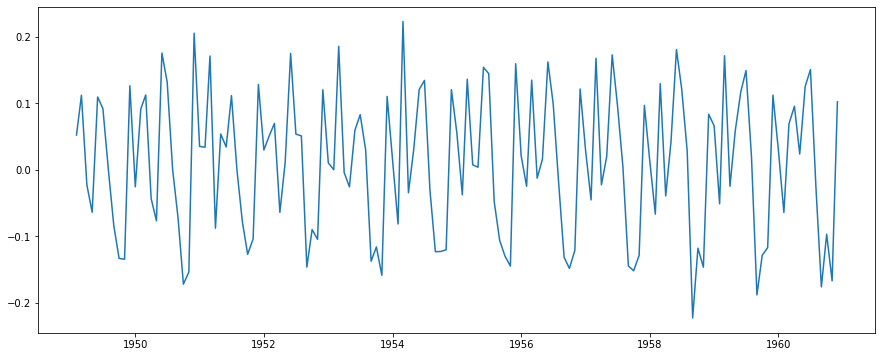

In [156]:
plt.plot(ts_log_diff)


In [157]:
ts_log_diff2 = ts_log_diff - ts_log_diff.shift()
ts_log_diff2.dropna(inplace=True)
dftest=adfuller(ts_log_diff2)
dftest


(-8.196629132182192,
 7.419304549378255e-13,
 13,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -430.893628286427)

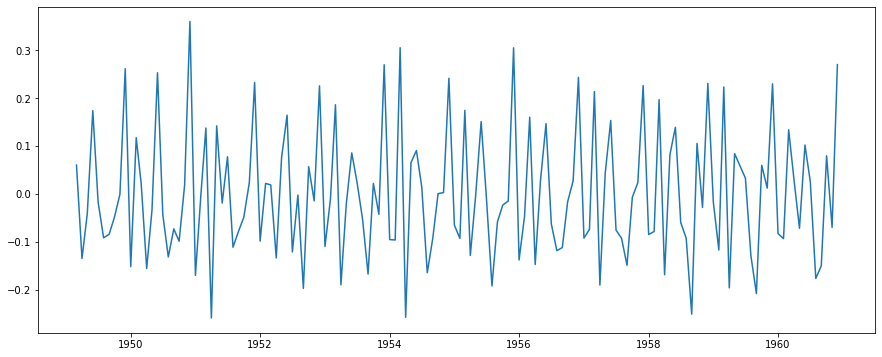

In [158]:
plt.plot(ts_log_diff2)

In [159]:
#common method - ARIMA (Autoregressive integrated Moving Average)
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff2, nlags=12)
lag_pacf = pacf(ts_log_diff2, nlags=12, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

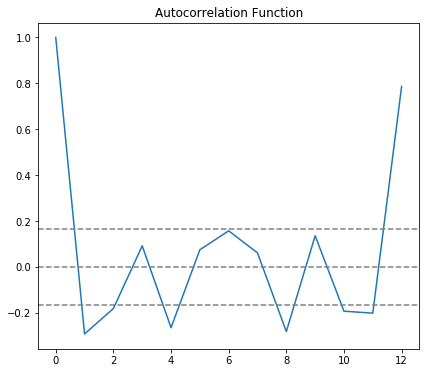

In [184]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff2)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

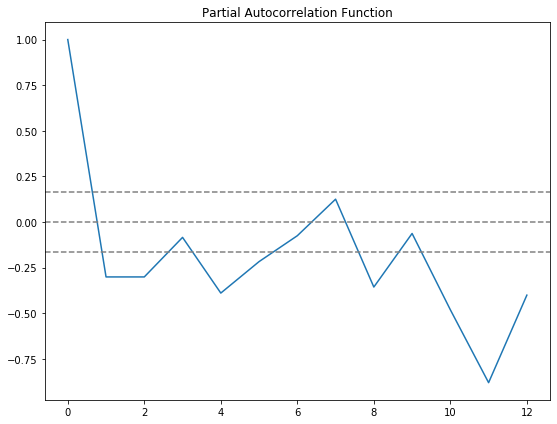

In [182]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff2)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

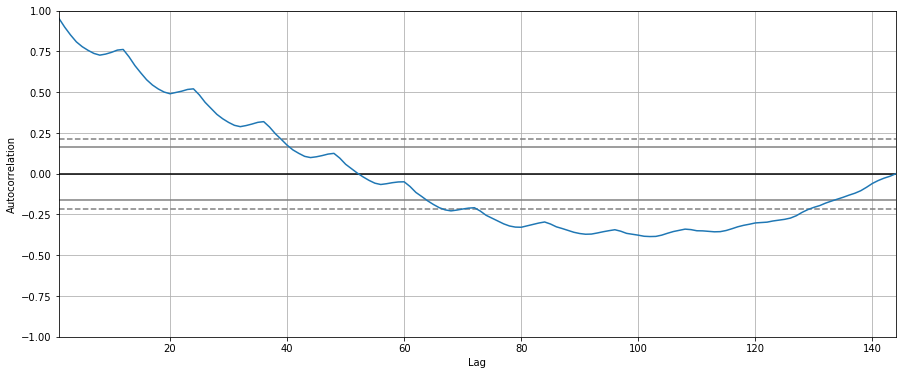

In [162]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts_log)

C:\Users\ASUS-PC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS-PC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS-PC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS-PC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS-PC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

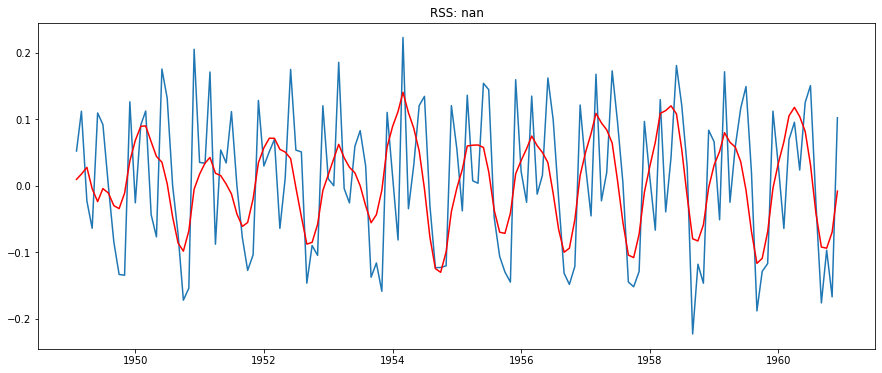

In [189]:
# AR Model
#We need to load the ARIMA model first:
from statsmodels.tsa.arima_model import ARIMA

model1 = ARIMA(ts_log, order=(2, 1, 0))  #RSS=1.5
model2 = ARIMA(ts_log, order=(0, 1, 2))  #RSS=1.4
model = ARIMA(ts_log, order=(2, 1, 2))  #RSS=1
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff2)**2))

In [164]:
print(results_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 149.640
Method:                       css-mle   S.D. of innovations              0.084
Date:                Thu, 09 Jan 2020   AIC                           -287.281
Time:                        02:40:10   BIC                           -269.504
Sample:                    02-01-1949   HQIC                          -280.057
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0096      0.003      3.697      0.000       0.005       0.015
ar.L1.D.#Passengers     1.6293      0.039     41.868      0.000       1.553       1.706
ar.L2.D.#Passeng

In [165]:
results_AR.forecast?

In [166]:
forecast_4months=results_AR.forecast(steps=4)

In [167]:
np.exp(forecast_4months[0])

array([443.87099559, 470.03826902, 504.93502836, 540.45485906])

In [174]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [175]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [176]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\ASUS-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5, 1.0, 'MAPE: -0.2442')

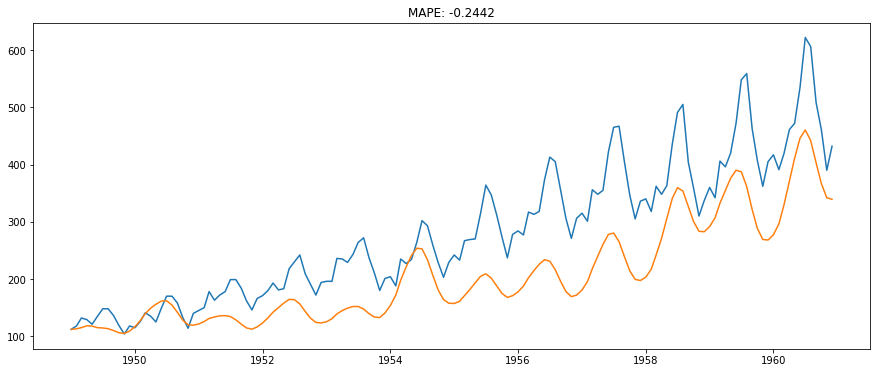

In [177]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
plt.title('MAPE: %.4f'% np.mean((predictions_ARIMA-ts)/ts))

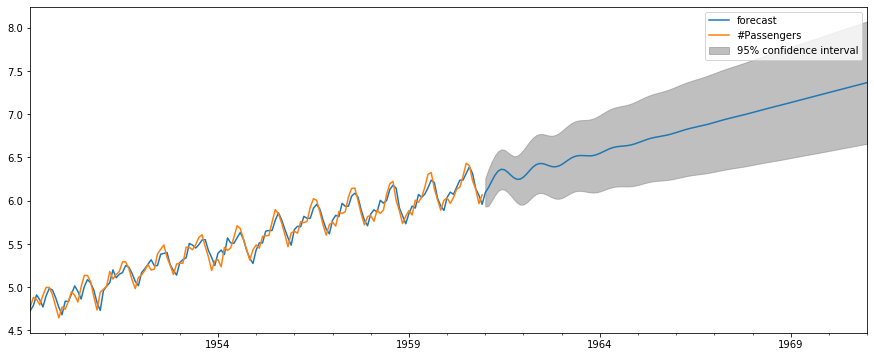

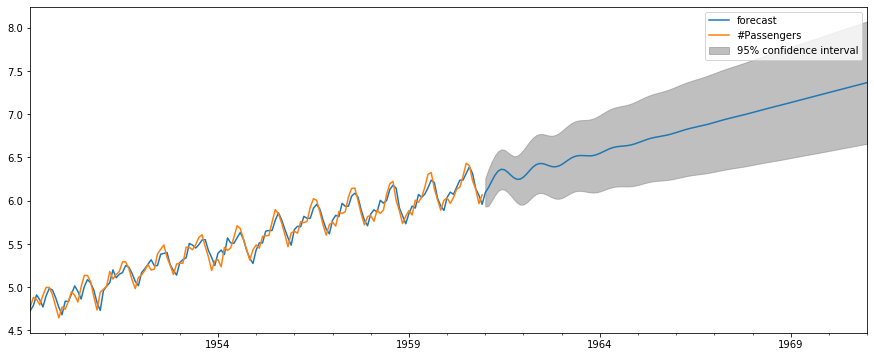

In [179]:
results.plot_predict(1,264)

or

C:\Users\ASUS-PC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS-PC\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

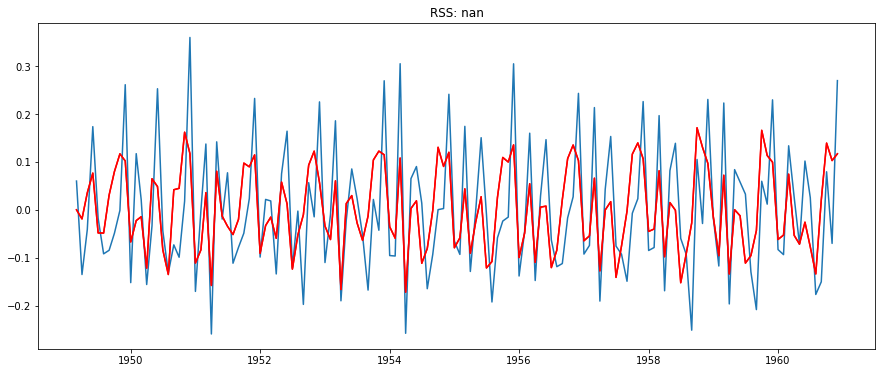

In [186]:
decomposition = seasonal_decompose(ts_log) 
model = ARIMA(ts_log, order=(2,2,2))
results = model.fit(disp=-1)
plt.plot(ts_log_diff2)
plt.plot(results.fittedvalues, color='red')
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff2)**2))

In [188]:
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:         D2.#Passengers   No. Observations:                  142
Model:                 ARIMA(2, 2, 2)   Log Likelihood                 121.227
Method:                       css-mle   S.D. of innovations              0.101
Date:                Thu, 09 Jan 2020   AIC                           -230.454
Time:                        03:09:27   BIC                           -212.720
Sample:                    03-01-1949   HQIC                          -223.248
                         - 12-01-1960                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -7.754e-05      0.000     -0.314      0.754      -0.001       0.000
ar.L1.D2.#Passengers    -0.5792      0.122     -4.736      0.000      -0.819      -0.339
ar.L2.D2.#Pa